# Feature extraction for Fake Review Dataset from Kaggle

In [38]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\limci\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\limci\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [39]:
import re
import nltk
from nltk import word_tokenize
from nltk import pos_tag

In [40]:
df = pd.read_csv("fake reviews dataset.csv")
df_predictions = pd.read_csv("Predicted_Classes_New_MINLOSS.csv")

In [41]:
test_data = df.reset_index().merge(df_predictions, how = 'right', left_on = 'index', right_on = 'Unnamed: 0')

In [42]:
test_data.head()

,index,category,rating,label,text_,Unnamed: 0,Actual_Class,Predicted_Class
0,35841,Toys_and_Games_5,3.0,OR,Sad that this doesn't come with any of the cri...,35841,0,0
1,5609,Sports_and_Outdoors_5,5.0,CG,"It works great as a starter kit, as long as yo...",5609,1,1
2,13793,Movies_and_TV_5,5.0,OR,I have piriformis syndrome so I a constantly t...,13793,0,0
3,22182,Pet_Supplies_5,3.0,OR,I put these collars on my 2 cats that were loo...,22182,0,0
4,14093,Movies_and_TV_5,5.0,OR,"I grew up with the original, my daughters are ...",14093,0,0


In [43]:
test_data.isna().sum()

index              0
category           0
rating             0
label              0
text_              0
Unnamed: 0         0
Actual_Class       0
Predicted_Class    0
dtype: int64

# Generate features

In [44]:
# Standard features
test_data['string_length'] = test_data.text_.str.len()
test_data['word_count'] = test_data['text_'].apply(lambda x: len(x.split()))

In [45]:
# Textblob subjectivity and polarity score
test_data['polarity'] = test_data['text_'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
test_data['subjectivity'] = test_data['text_'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

In [46]:
test_data

,index,category,rating,label,text_,Unnamed: 0,Actual_Class,Predicted_Class,string_length,word_count,polarity,subjectivity
0,35841,Toys_and_Games_5,3.0,OR,Sad that this doesn't come with any of the cri...,35841,0,0,512,101,0.060000,0.760000
1,5609,Sports_and_Outdoors_5,5.0,CG,"It works great as a starter kit, as long as yo...",5609,1,1,147,29,0.256250,0.631250
2,13793,Movies_and_TV_5,5.0,OR,I have piriformis syndrome so I a constantly t...,13793,0,0,241,44,0.000000,0.333333
3,22182,Pet_Supplies_5,3.0,OR,I put these collars on my 2 cats that were loo...,22182,0,0,292,58,-0.036111,0.442778
4,14093,Movies_and_TV_5,5.0,OR,"I grew up with the original, my daughters are ...",14093,0,0,331,60,0.408333,0.633333
...,...,...,...,...,...,...,...,...,...,...,...,...
4039,1170,Home_and_Kitchen_5,5.0,OR,Gave this to my mom as a gift. She loved it.\...,1170,0,0,109,23,0.522619,0.742857
4040,31664,Books_5,4.0,CG,"As I've stated in other reviews, I thought the...",31664,1,1,539,104,0.280347,0.482361
4041,12327,Movies_and_TV_5,4.0,OR,I had purchase this particularly move for my b...,12327,0,0,78,14,0.166667,0.333333
4042,13394,Movies_and_TV_5,2.0,CG,"I only watched a few episodes of the show, and...",13394,1,1,143,29,0.100000,0.537500


In [47]:
# NLTK POS tagging
test_data['tokenized'] = test_data['text_'].str.lower().apply(nltk.word_tokenize)
test_data['pos_tagged'] = test_data['tokenized'].apply(nltk.pos_tag)

In [48]:
test_data['nouns'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['NN', 'NNS']])
test_data['proper_nouns'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['NNP', 'NNPS']])
test_data['verbs'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']])
test_data['adverb'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['RB','RBR','RBS']])
test_data['adjective'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['JJ','JJR','JJS']])
test_data['conjunction'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['CC']])
test_data['determiner'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['DT']])
test_data['predeterminer'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['PDT']])
test_data['foreign_words'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['fw']])
test_data['cardinal_digits'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['CD']])

In [49]:
test_data['no_nouns'] = test_data['nouns'].apply(len) 
test_data['no_proper_nouns'] = test_data['proper_nouns'].apply(len)
test_data['no_verbs'] = test_data['verbs'].apply(len)
test_data['no_adverb'] = test_data['adverb'].apply(len)
test_data['no_adjective'] = test_data['adjective'].apply(len)
test_data['no_conjunction'] = test_data['conjunction'].apply(len)
test_data['no_determiner'] = test_data['determiner'].apply(len)
test_data['no_predeterminer'] = test_data['predeterminer'].apply(len)
test_data['no_foreign_words'] = test_data['foreign_words'].apply(len)
test_data['no_cardinal_digits'] = test_data['cardinal_digits'].apply(len)

In [50]:
test_data['percent_nouns'] = test_data['no_nouns']/ test_data['word_count'] 
test_data['percent_proper_nouns'] = test_data['no_proper_nouns']/ test_data['word_count']
test_data['percent_verbs'] = test_data['no_verbs']/ test_data['word_count']
test_data['percent_adverb'] = test_data['no_adverb']/ test_data['word_count']
test_data['percent_adjective'] = test_data['no_adjective']/ test_data['word_count']
test_data['percent_conjunction'] = test_data['no_conjunction']/ test_data['word_count']
test_data['percent_determiner'] = test_data['no_determiner']/ test_data['word_count']
test_data['percent_predeterminer'] = test_data['no_predeterminer']/ test_data['word_count']
test_data['percent_foreign_words'] = test_data['no_foreign_words']/ test_data['word_count']
test_data['percent_cardinal_digits'] = test_data['no_cardinal_digits']/ test_data['word_count']

In [51]:
test_data.iloc[:,-10:].head()

,percent_nouns,percent_proper_nouns,percent_verbs,percent_adverb,percent_adjective,percent_conjunction,percent_determiner,percent_predeterminer,percent_foreign_words,percent_cardinal_digits
0,0.148515,0.0,0.198020,0.099010,0.039604,0.029703,0.138614,0.0,0.0,0.039604
1,0.172414,0.0,0.137931,0.103448,0.137931,0.034483,0.137931,0.0,0.0,0.034483
2,0.227273,0.0,0.318182,0.045455,0.068182,0.045455,0.068182,0.0,0.0,0.000000
3,0.189655,0.0,0.258621,0.051724,0.034483,0.000000,0.086207,0.0,0.0,0.017241
4,0.183333,0.0,0.183333,0.050000,0.150000,0.033333,0.100000,0.0,0.0,0.000000


# EDA and slicing

In [52]:
df1 = test_data.copy()

In [53]:
df1.category.unique()

array(['Toys_and_Games_5', 'Sports_and_Outdoors_5', 'Movies_and_TV_5',
       'Pet_Supplies_5', 'Clothing_Shoes_and_Jewelry_5',
       'Home_and_Kitchen_5', 'Electronics_5',
       'Tools_and_Home_Improvement_5', 'Kindle_Store_5', 'Books_5'],
      dtype=object)

In [64]:
prop_matrix = df1.groupby(['category','Predicted_Class']).agg({'string_length':'mean',
                                     'word_count':'mean',
                                     'polarity':'mean',
                                     'subjectivity':'mean',
                                     'percent_nouns':'mean',
                                     'percent_proper_nouns':'mean',
                                     'percent_verbs':'mean',
                                     'percent_adverb':'mean',
                                     'percent_adjective':'mean',
                                     'percent_conjunction':'mean',
                                     'percent_determiner':'mean',
                                     'percent_predeterminer':'mean',
                                     'percent_foreign_words':'mean',
                                     'percent_cardinal_digits':'mean',
                                    }).reset_index()
prop_matrix
prop_matrix.to_excel('prop_matrix kaggle prediction.xlsx')

In [65]:
prop_matrix2 = df1.groupby(['Predicted_Class']).agg({'string_length':'mean',
                                     'word_count':'mean',
                                     'polarity':'mean',
                                     'subjectivity':'mean',
                                     'percent_nouns':'mean',
                                     'percent_proper_nouns':'mean',
                                     'percent_verbs':'mean',
                                     'percent_adverb':'mean',
                                     'percent_adjective':'mean',
                                     'percent_conjunction':'mean',
                                     'percent_determiner':'mean',
                                     'percent_predeterminer':'mean',
                                     'percent_foreign_words':'mean',
                                     'percent_cardinal_digits':'mean',
                                    }).reset_index()
prop_matrix2
prop_matrix2.to_excel('prop_matrix_label kaggle prediction.xlsx')

In [56]:
df1

,index,category,rating,label,text_,Unnamed: 0,Actual_Class,Predicted_Class,string_length,word_count,...,percent_nouns,percent_proper_nouns,percent_verbs,percent_adverb,percent_adjective,percent_conjunction,percent_determiner,percent_predeterminer,percent_foreign_words,percent_cardinal_digits
0,35841,Toys_and_Games_5,3.0,OR,Sad that this doesn't come with any of the cri...,35841,0,0,512,101,...,0.148515,0.0,0.198020,0.099010,0.039604,0.029703,0.138614,0.0,0.0,0.039604
1,5609,Sports_and_Outdoors_5,5.0,CG,"It works great as a starter kit, as long as yo...",5609,1,1,147,29,...,0.172414,0.0,0.137931,0.103448,0.137931,0.034483,0.137931,0.0,0.0,0.034483
2,13793,Movies_and_TV_5,5.0,OR,I have piriformis syndrome so I a constantly t...,13793,0,0,241,44,...,0.227273,0.0,0.318182,0.045455,0.068182,0.045455,0.068182,0.0,0.0,0.000000
3,22182,Pet_Supplies_5,3.0,OR,I put these collars on my 2 cats that were loo...,22182,0,0,292,58,...,0.189655,0.0,0.258621,0.051724,0.034483,0.000000,0.086207,0.0,0.0,0.017241
4,14093,Movies_and_TV_5,5.0,OR,"I grew up with the original, my daughters are ...",14093,0,0,331,60,...,0.183333,0.0,0.183333,0.050000,0.150000,0.033333,0.100000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039,1170,Home_and_Kitchen_5,5.0,OR,Gave this to my mom as a gift. She loved it.\...,1170,0,0,109,23,...,0.173913,0.0,0.173913,0.086957,0.086957,0.043478,0.086957,0.0,0.0,0.000000
4040,31664,Books_5,4.0,CG,"As I've stated in other reviews, I thought the...",31664,1,1,539,104,...,0.211538,0.0,0.259615,0.048077,0.086538,0.038462,0.125000,0.0,0.0,0.000000
4041,12327,Movies_and_TV_5,4.0,OR,I had purchase this particularly move for my b...,12327,0,0,78,14,...,0.357143,0.0,0.142857,0.071429,0.000000,0.000000,0.142857,0.0,0.0,0.000000
4042,13394,Movies_and_TV_5,2.0,CG,"I only watched a few episodes of the show, and...",13394,1,1,143,29,...,0.206897,0.0,0.206897,0.172414,0.068966,0.068966,0.172414,0.0,0.0,0.000000


In [57]:
# df1['tgt_bool'] = df1['label'].apply(lambda x: 1 if x =='OR' else 0)

<Axes: >

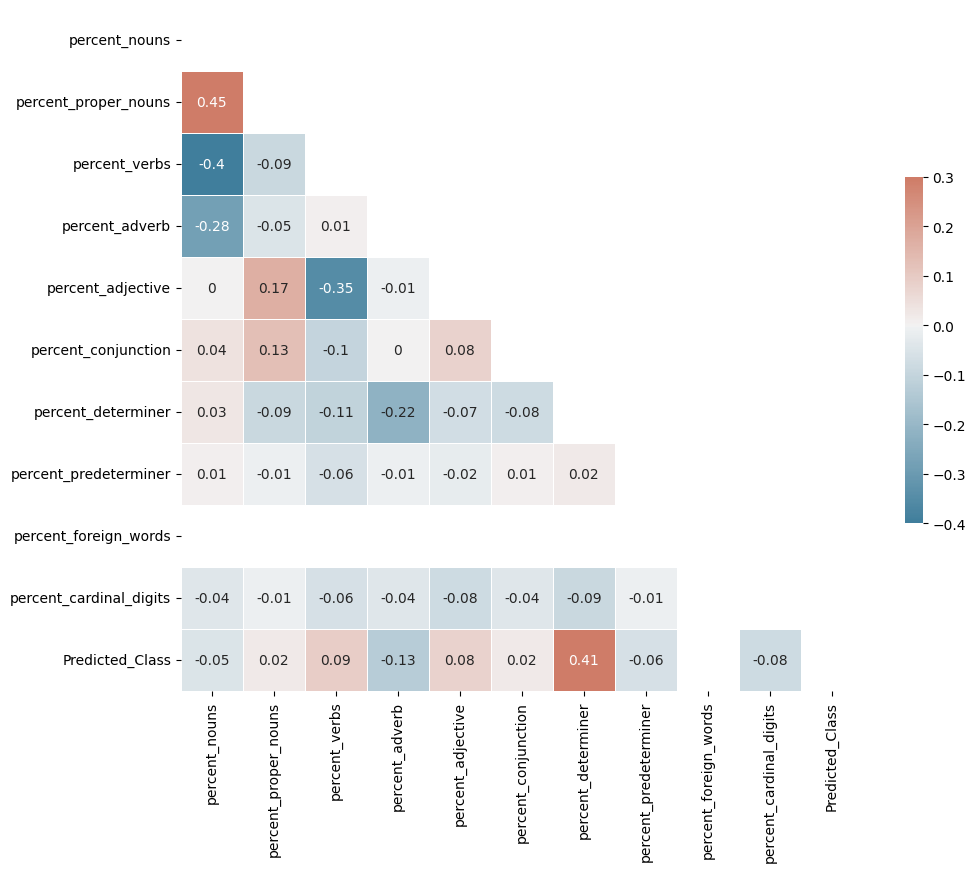

In [58]:
corr = df1[df1.columns.tolist()[-10:] + ['Predicted_Class']].corr()
corr = np.round(corr, 2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

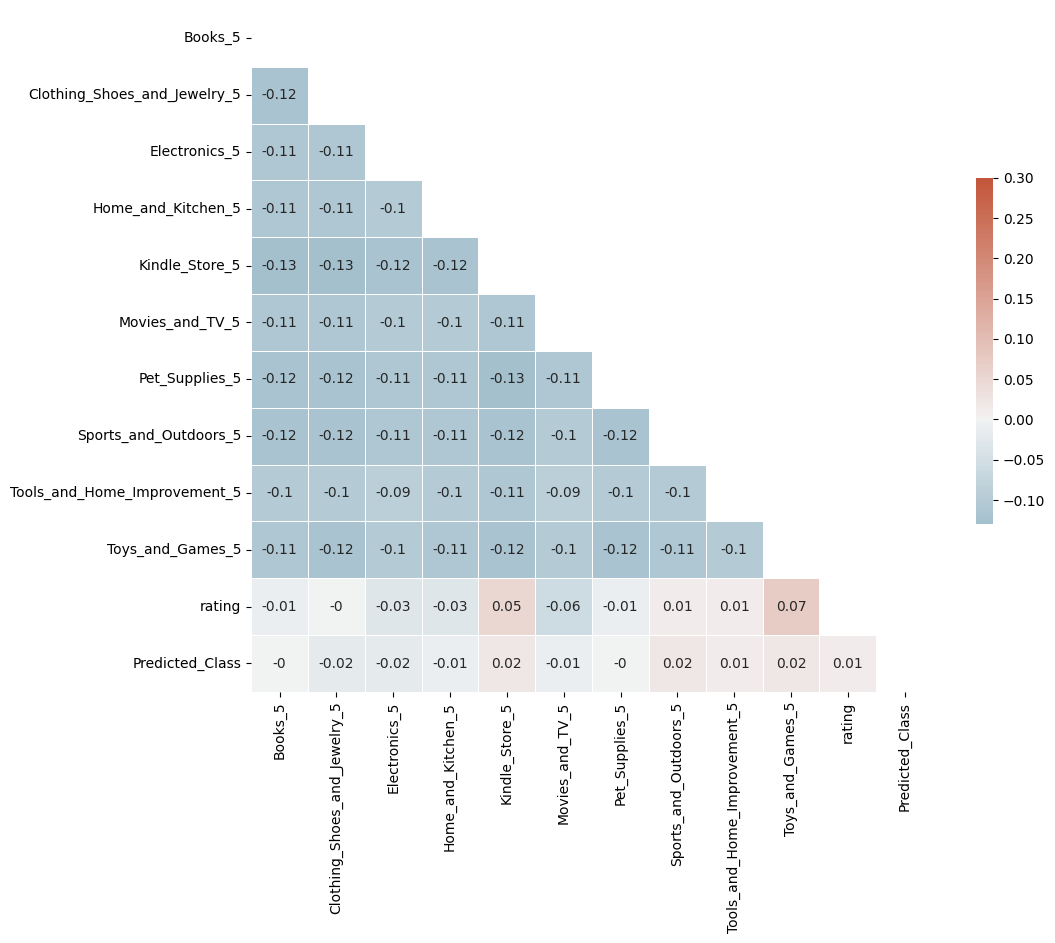

In [59]:
category = pd.get_dummies(df1['category'])
df2 = pd.concat([df1,category], axis = 1)
corr = df2[category.columns.tolist() + ['rating','Predicted_Class']].corr()
corr = np.round(corr, 2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [60]:
# sns.barplot(df, x = 'category', y = 'string_length', hue = 'label')
# plt.xticks(rotation=70)
# plt.tight_layout()

In [61]:
# sns.barplot(df, x = 'category', y = 'word_count', hue = 'label')
# plt.xticks(rotation=70)
# plt.tight_layout()

In [62]:
# sns.barplot(df, x = 'category', y = 'subjectivity', hue = 'label')
# plt.xticks(rotation=70)
# plt.tight_layout()

In [63]:
# sns.barplot(df, x = 'category', y = 'polarity', hue = 'label')
# plt.xticks(rotation=70)
# plt.tight_layout()